In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ahu11 = pd.read_csv('AHU_11.csv')
ahu11 = ahu11.ffill()
ahu11.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13
0,31-12-2015,00:00:00,OFF,1.9,76.6,2.0,76.7,75.8,16.0,77.6,15.1,78.6,15.1
1,31-12-2015,00:09:35,OFF,1.9,76.6,2.0,76.7,75.8,16.0,77.6,15.1,78.6,15.1
2,31-12-2015,00:09:50,OFF,1.9,76.6,2.0,76.7,75.8,16.0,77.6,15.1,78.6,15.1
3,31-12-2015,00:10:04,OFF,1.9,76.6,2.0,76.7,75.8,16.0,77.6,15.1,78.6,15.1
4,31-12-2015,00:10:19,OFF,1.9,76.6,2.0,76.7,75.8,16.0,77.6,15.1,78.6,15.1


In [3]:
ahu11.rename(columns={'Column1': 'Date', 'Column2': 'Time', 'Column3':'supply fan ON?OFF', 'Column4' : 'Cooling coil valve %open'},inplace=True)
ahu11.rename(columns={'Column5':'Discharger temperature', 'Column6': 'Mixed air damper % open', 'Column7': 'Mixed air temperature'},inplace=True)
ahu11.rename(columns={'Column8':'Pre-heat coil discharger temperature', 'Column9':'Pre-heat coil Discharger valve', 'Column10': 'Re-heat coil 1 discharger temperature'},inplace=True)
ahu11.rename(columns={'Column11': 'Re-heat coil 1 Discharger value','Column12': 'Re-heat coil 2 discharger temperature', 'Column13':'Re-heat coil 2 Discharger value'},inplace=True)
ahu11.head()

,Date,Time,supply fan ON?OFF,Cooling coil valve %open,Discharger temperature,Mixed air damper % open,Mixed air temperature,Pre-heat coil discharger temperature,Pre-heat coil Discharger valve,Re-heat coil 1 discharger temperature,Re-heat coil 1 Discharger value,Re-heat coil 2 discharger temperature,Re-heat coil 2 Discharger value
0,31-12-2015,00:00:00,OFF,1.9,76.6,2.0,76.7,75.8,16.0,77.6,15.1,78.6,15.1
1,31-12-2015,00:09:35,OFF,1.9,76.6,2.0,76.7,75.8,16.0,77.6,15.1,78.6,15.1
2,31-12-2015,00:09:50,OFF,1.9,76.6,2.0,76.7,75.8,16.0,77.6,15.1,78.6,15.1
3,31-12-2015,00:10:04,OFF,1.9,76.6,2.0,76.7,75.8,16.0,77.6,15.1,78.6,15.1
4,31-12-2015,00:10:19,OFF,1.9,76.6,2.0,76.7,75.8,16.0,77.6,15.1,78.6,15.1


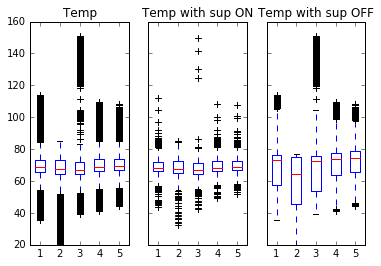

In [5]:
data_temp = [ahu11['Discharger temperature'],ahu11['Mixed air temperature'],ahu11['Pre-heat coil discharger temperature'],
             ahu11['Re-heat coil 1 discharger temperature'],ahu11['Re-heat coil 2 discharger temperature']]
sup_on = ahu11[ahu11['supply fan ON?OFF'].str.contains('ON')]
sup_off = ahu11[ahu11['supply fan ON?OFF'].str.contains('OFF')]
data_temp_1 = [sup_on['Discharger temperature'],sup_on['Mixed air temperature'],sup_on['Pre-heat coil discharger temperature'],
             sup_on['Re-heat coil 1 discharger temperature'],sup_on['Re-heat coil 2 discharger temperature']]
data_temp_2 = [sup_off['Discharger temperature'],sup_off['Mixed air temperature'],sup_off['Pre-heat coil discharger temperature'],
             sup_off['Re-heat coil 1 discharger temperature'],sup_off['Re-heat coil 2 discharger temperature']]
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey = True)
ax1.boxplot(data_temp)
ax1.set_title('Temp')
ax2.boxplot(data_temp_1)
ax2.set_title('Temp with sup ON')
ax3.boxplot(data_temp_2)
ax3.set_title('Temp with sup OFF')
#plt.show()
plt.savefig(''.join(['temperature','_ahu_11']))

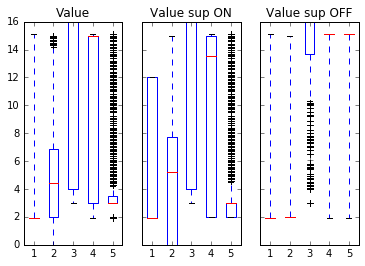

In [6]:
data_valve = [ahu11['Cooling coil valve %open'],ahu11['Mixed air damper % open'],ahu11['Pre-heat coil Discharger valve'],
              ahu11['Re-heat coil 1 Discharger value'],ahu11['Re-heat coil 2 Discharger value']]
data_valve_1 = [sup_on['Cooling coil valve %open'],sup_on['Mixed air damper % open'],sup_on['Pre-heat coil Discharger valve'],
              sup_on['Re-heat coil 1 Discharger value'],sup_on['Re-heat coil 2 Discharger value']]
data_valve_2 = [sup_off['Cooling coil valve %open'],sup_off['Mixed air damper % open'],sup_off['Pre-heat coil Discharger valve'],
              sup_off['Re-heat coil 1 Discharger value'],sup_off['Re-heat coil 2 Discharger value']]
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey = True)
ax1.boxplot(data_valve)
ax1.set_title('Value')
ax2.boxplot(data_valve_1)
ax2.set_title('Value sup ON')
ax3.boxplot(data_valve_2)
ax3.set_title('Value sup OFF')
#plt.show()
plt.savefig(''.join(['valve','_ahu11']))

In [13]:
print ahu11.columns.values
df1 = ahu11.copy()
df1 = df1.drop(['Date', 'Time', 'supply fan ON?OFF'],1)

['Date' 'Time' 'supply fan ON?OFF' 'Cooling coil valve %open'
 'Discharger temperature' 'Mixed air damper % open' 'Mixed air temperature'
 'Pre-heat coil discharger temperature' 'Pre-heat coil Discharger valve'
 'Re-heat coil 1 discharger temperature' 'Re-heat coil 1 Discharger value'
 'Re-heat coil 2 discharger temperature' 'Re-heat coil 2 Discharger value']


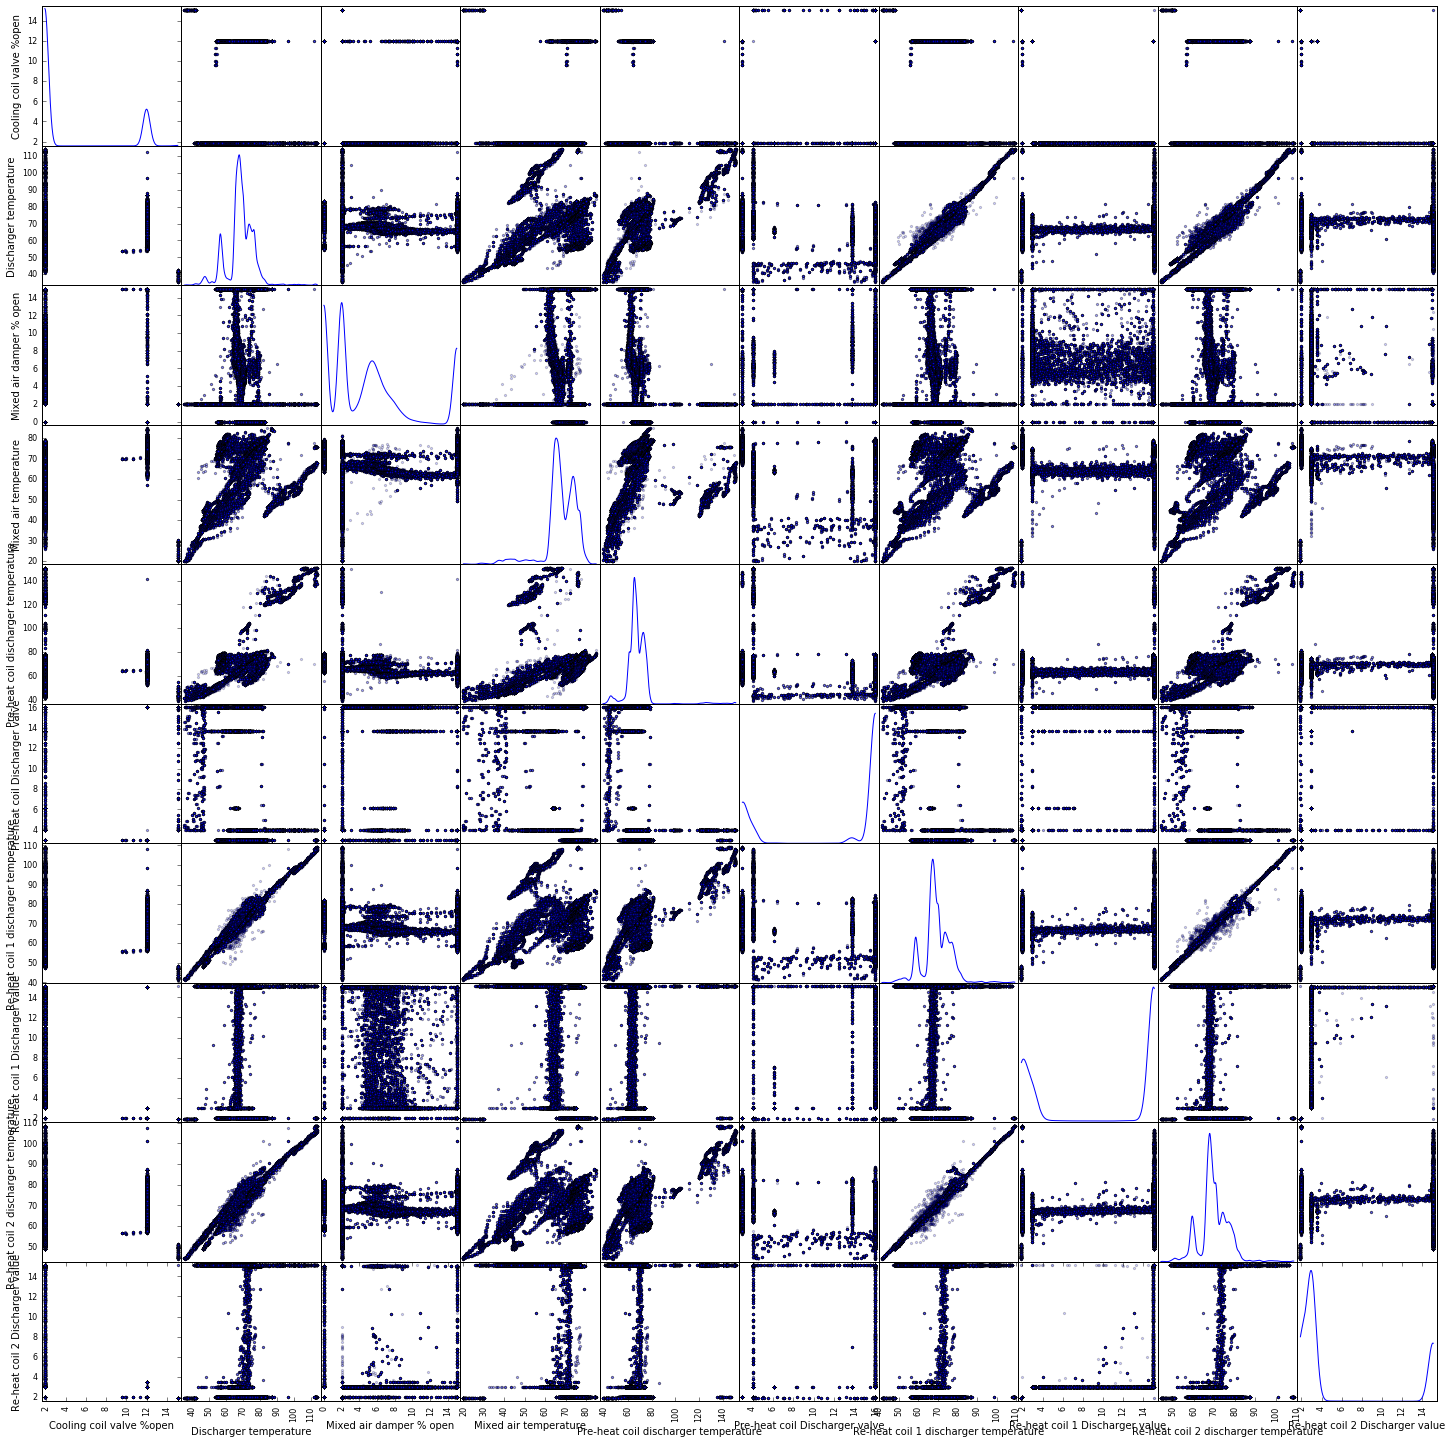

In [15]:
df = pd.scatter_matrix(df1, alpha=0.2, figsize = (25,25), diagonal='kde')
plt.savefig(''.join(['bivariate','_ahu_11']))